/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'color'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


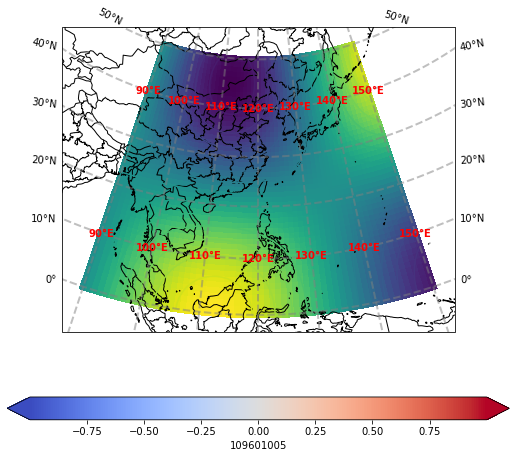

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import numpy as np
from matplotlib.ticker import MaxNLocator
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
fig = plt.figure(figsize=(10,8))

lonl = 90
lonr = 150
latb = 0
latt = 50
ngridx = lonr - lonl
ngridy = latt - latb

# lambertconformal projection;
#120: central longitude
#25: central latitude
#(30,45): parallel latitudes:
c_lon = 120
c_lat = 25
para_latt = 45
para_latb = 30

lon = np.linspace(lonl, lonr, ngridx)#x-asis
lat = np.linspace(latb, latt, ngridy)#y-asis
lon2d, lat2d = np.meshgrid(lon, lat)#coordinates for 2d points

data = np.cos(np.deg2rad(lat2d)*4)*np.sin(np.deg2rad(lon2d)*4)#our data
levels = MaxNLocator(nbins=15).tick_values(data.min(), data.max())
proj = ccrs.LambertConformal(central_latitude = c_lat,
                             central_longitude = c_lon,
                             standard_parallels = (para_latb, para_latt))

ax = plt.axes(projection = proj)
cs=ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(), cmap='coolwarm')
cbar = plt.colorbar(cs, shrink=0.9, orientation='horizontal', label= '109601005', extend='both')
ax.contour(lon, lat, data, levels=levels, color='k', transform=ccrs.PlateCarree())
ax.pcolormesh(lon, lat, data, transform = ccrs.PlateCarree())

ax.add_feature(cfeat.NaturalEarthFeature(category='cultural',
                                        name='admin_1_states_provinces_lines',
                                        scale='50m',
                                        facecolor='none'))
ax.coastlines('50m')
ax.add_feature(cfeat.BORDERS)

#add map grid lines and legends
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = True
gl.ylabels_left = True
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator(range(lonl, lonr+10, 10))
gl.xformatter = LONGITUDE_FORMATTER
gl.yfromatter = LATITUDE_FORMATTER

gl.xlabel_style = {'size':15, 'color':'gray'}
gl.xlabel_style = {'color':'red', 'weight':'bold'}

fig.savefig('ttcartopy.png', dpi=300)
plt.show()